# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Data Analytics and Visualization Bootcamp 
# Student Name: Thet Win
# Module 6 - Python APIs (Weather API - Mesurements by Latitude)
# Modified Date: June 9, 2024
# 
# This program retrieves weather data from OpenWeatherMap API from the cities list generated in the starter code and 
# produces a series of scatter plots with linear regression testing to showcase the following relationships:
# Latitude vs. Temperature
# Latitude vs. Humidity
# Latitude vs. Cloudiness
# Latitude vs. Wind Speed
#
# The program then saves the Scatter plots as .png images in 'output_data' folder.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pathlib import Path
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Set up relative Path using Current Working Directory
cwd=Path.cwd().parent

# File to output
outputfile = os.path.join(cwd,'output_data','cities.csv')
output_data_fldr = os.path.join(cwd,'output_data')
starter_code_fldr = os.path.join(cwd,'starter_code')

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units=metric&q="

# Check the partial link
print(query_url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?appid=3b51ebdc74183ea6f72a15605d1ef46c&units=metric&q=
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | pasuquin
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | uige
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | bourg-saint-andeol
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | sola
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | kalkaman
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | sebdou
Processing Record 19 of Set 1 | kodiak
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-31.8976,26.8753,10.48,52,0,3.35,ZA,1717954899
1,port-aux-francais,-49.3500,70.2167,6.77,99,100,16.92,TF,1717954899
2,yellowknife,62.4560,-114.3525,12.29,73,75,5.14,CA,1717954899
3,pasuquin,18.3328,120.6177,28.00,78,100,1.94,PH,1717954900
4,ust-nera,64.5667,143.2000,5.74,48,80,1.93,RU,1717954900


In [6]:
# Export the City_Data into a csv
#city_data_df.to_csv("C:/Users/User/Desktop/bootcamp/Class Modules/Module 06 - Python APIs/assignment/Starter_Code/output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv(outputfile, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(outputfile, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,10.48,52,0,3.35,ZA,1717954899
1,port-aux-francais,-49.3500,70.2167,6.77,99,100,16.92,TF,1717954899
2,yellowknife,62.4560,-114.3525,12.29,73,75,5.14,CA,1717954899
3,pasuquin,18.3328,120.6177,28.00,78,100,1.94,PH,1717954900
4,ust-nera,64.5667,143.2000,5.74,48,80,1.93,RU,1717954900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

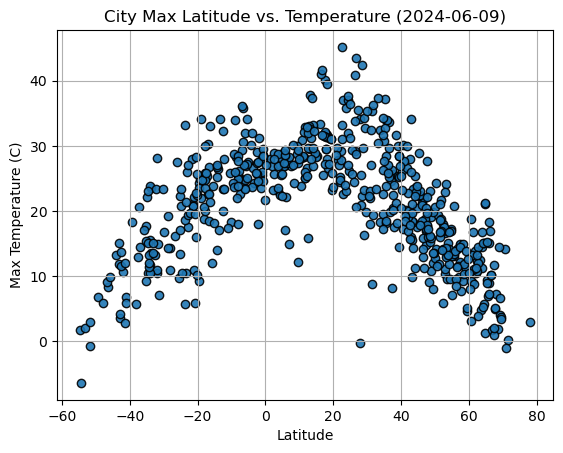

In [12]:
# Build scatter plot for latitude vs. temperature

# For saving images, use subplots
fig, ax = plt.subplots()

# Create a subset for weather data from the City Data Dataframe
weather_data = city_data_df[['City', 'Lat', 'Max Temp']]

# Incorporate the other graph properties
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

# Plot the scatter plot with datapoints edge folor = black and opicity=90%
plt.scatter(x_values,y_values,alpha=0.9, edgecolors='black')
plt.title('City Max Latitude vs. Temperature (2024-06-09)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid('on')
plt.show()

# Save the figure
fig.savefig(output_data_fldr + "/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

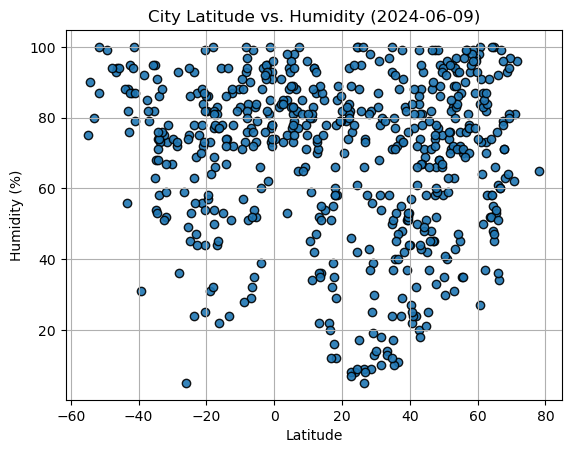

In [13]:
# Build the scatter plots for latitude vs. humidity

# For saving images, use subplots
fig, ax = plt.subplots()

# Create a subset for weather data from the City Data Dataframe
weather_data2 = city_data_df[['City', 'Lat', 'Humidity']]

# Incorporate the other graph properties
x_values2 = weather_data2['Lat']
y_values2 = weather_data2['Humidity']

# Plot the scatter plot with datapoints edge folor = black and opicity=90%
plt.scatter(x_values2,y_values2,alpha=0.9, edgecolors='black')
plt.title('City Latitude vs. Humidity (2024-06-09)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid('on')
plt.show()

# Save the figure
fig.savefig(output_data_fldr + "/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

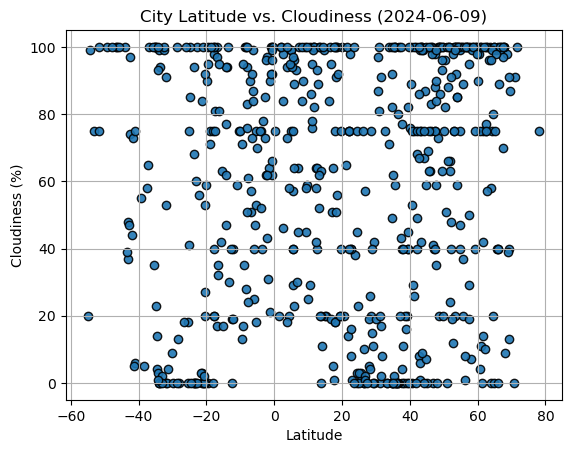

In [14]:
# Build the scatter plots for latitude vs. cloudiness

# For saving images, use subplots
fig, ax = plt.subplots()

# Create a subset for weather data from the City Data Dataframe
weather_data3 = city_data_df[['City', 'Lat', 'Cloudiness']]

# Incorporate the other graph properties
x_values3 = weather_data3['Lat']
y_values3 = weather_data3['Cloudiness']

# Plot the scatter plot with datapoints edge folor = black and opicity=90%
plt.scatter(x_values3,y_values3,alpha=0.9, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (2024-06-09)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid('on')
plt.show()

# Save the figure
fig.savefig(output_data_fldr + "/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

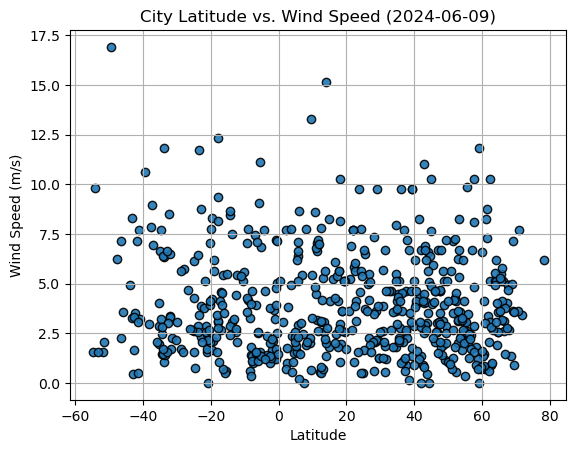

In [15]:
# Build the scatter plots for latitude vs. wind speed

# For saving images, use subplots
fig, ax = plt.subplots()

# Create a subset for weather data from the City Data Dataframe
weather_data4 = city_data_df[['City', 'Lat', 'Wind Speed']]

# Incorporate the other graph properties
x_values4 = weather_data4['Lat']
y_values4 = weather_data4['Wind Speed']

# Plot the scatter plot with datapoints edge folor = black and opicity=90%
plt.scatter(x_values4,y_values4,alpha=0.9, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (2024-06-09)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid('on')
plt.show()

# Save the figure
fig.savefig(output_data_fldr + "/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_regress(x_values_regress, y_values_regress):
    # Initiate an empty dictionary to store the results
    results = {}
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_regress, y_values_regress)

    results = {
        "Slope": slope, 
        "Intercept": intercept, 
        "Rvalue": rvalue, 
        "Pvalue": pvalue, 
        "Stderr": stderr
    }
    return results

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,12.29,73,75,5.14,CA,1717954899
3,pasuquin,18.3328,120.6177,28.00,78,100,1.94,PH,1717954900
4,ust-nera,64.5667,143.2000,5.74,48,80,1.93,RU,1717954900
8,ponta delgada,37.7333,-25.6667,20.40,73,40,4.63,PT,1717954900
10,bourg-saint-andeol,44.3757,4.6427,23.66,69,87,5.06,FR,1717954900


In [18]:
# Call regression function and store the regression values for plotting
# Northern Hemisphere

x_values_north = northern_hemi_df["Lat"].astype("float")
y_values_temp_north = northern_hemi_df["Max Temp"].astype("float") 
y_values_humidity_north = northern_hemi_df["Humidity"].astype("float") 
y_values_cloudiness_north = northern_hemi_df["Cloudiness"].astype("float") 
y_values_wind_north = northern_hemi_df["Wind Speed"].astype("float") 

# Regression values for Max Temperature, Humididty, Coudiness and Wind Speed  - Northern
plot_regress_temp_north = plot_regress(x_values_north, y_values_temp_north)
plot_regress_humidity_north = plot_regress(x_values_north, y_values_humidity_north)
plot_regress_cloudiness_north = plot_regress(x_values_north, y_values_cloudiness_north)
plot_regress_wind_north = plot_regress(x_values_north, y_values_wind_north)

In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,10.48,52,0,3.35,ZA,1717954899
1,port-aux-francais,-49.3500,70.2167,6.77,99,100,16.92,TF,1717954899
5,port elizabeth,-33.9180,25.5701,11.72,86,0,1.03,ZA,1717954900
6,uige,-7.6087,15.0613,22.68,51,61,1.02,AO,1717954900
7,adamstown,-25.0660,-130.1015,22.26,75,41,6.14,PN,1717954900


In [20]:
# Call regression function and store the regression values for plotting
# Southern Hemisphere

x_values_south = southern_hemi_df["Lat"].astype("float")
y_values_temp_south = southern_hemi_df["Max Temp"].astype("float") 
y_values_humidity_south = southern_hemi_df["Humidity"].astype("float") 
y_values_cloudiness_south = southern_hemi_df["Cloudiness"].astype("float") 
y_values_wind_south = southern_hemi_df["Wind Speed"].astype("float") 

# Regression values for Max Temperature, Humididty, Coudiness and Wind Speed  - Northern
plot_regress_temp_south = plot_regress(x_values_south, y_values_temp_south)
plot_regress_humidity_south = plot_regress(x_values_south, y_values_humidity_south)
plot_regress_cloudiness_south = plot_regress(x_values_south, y_values_cloudiness_south)
plot_regress_wind_south = plot_regress(x_values_south, y_values_wind_south)


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7397760807687281


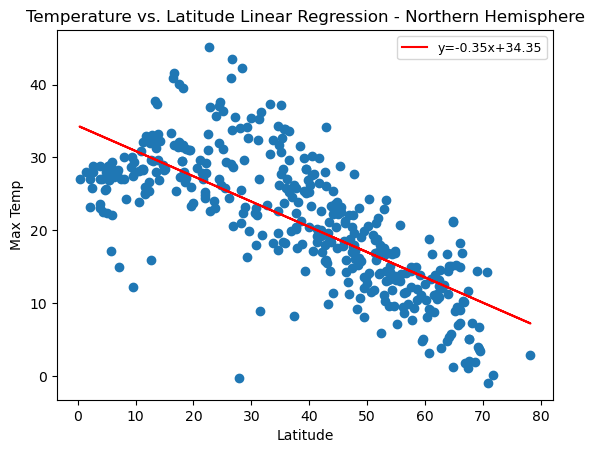

In [21]:
# Temperature vs. Latitude Linear Regression - Northern Hemisphere

# Extract data from dictionary
slope_temp_north = plot_regress_temp_north['Slope']
intercept_temp_north = plot_regress_temp_north['Intercept']
rvalue_temp_north = plot_regress_temp_north['Rvalue']

# Run linear regression
regress_values_temp_north = x_values_north * slope_temp_north + intercept_temp_north
line_eq_temp_north = "y = " + str(round(slope_temp_north,2)) + "x + " + str(round(intercept_temp_north,2))

# Plot scatter plot
plt.scatter(x_values_north,y_values_temp_north)

# Plot regression line
plt.plot(x_values_north,regress_values_temp_north, "r-", label='y={:.2f}x+{:.2f}'.format(slope_temp_north,intercept_temp_north) )

# Label plot
plt.title('Temperature vs. Latitude Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_temp_north))


The r-value is: 0.768703327775181


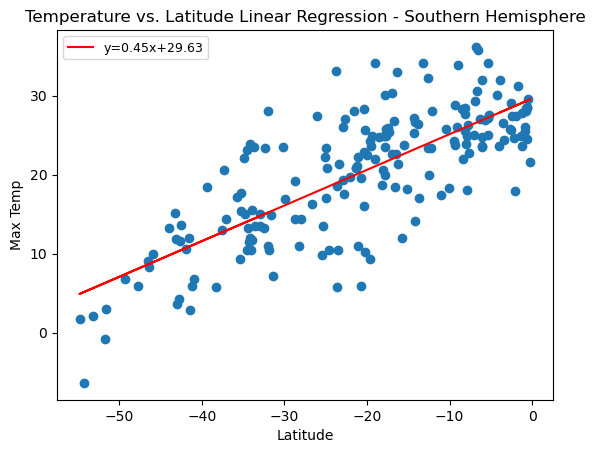

In [22]:
# Temperature vs. Latitude Linear Regression - Southern Hemisphere

# Extract data from dictionary
slope_temp_south = plot_regress_temp_south['Slope']
intercept_temp_south = plot_regress_temp_south['Intercept']
rvalue_temp_south = plot_regress_temp_south['Rvalue']

# Run linear regression
regress_values_temp_south= x_values_south * slope_temp_south + intercept_temp_south
line_eq_temp_south = "y = " + str(round(slope_temp_south,2)) + "x + " + str(round(intercept_temp_south,2))

# Plot scatter plot
plt.scatter(x_values_south,y_values_temp_south)

# Plot regression line
plt.plot(x_values_south,regress_values_temp_south, "r-", label='y={:.2f}x+{:.2f}'.format(slope_temp_south,intercept_temp_south) )

# Label plot
plt.title('Temperature vs. Latitude Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_temp_south))

**Discussion about the linear relationship:** 
A negative linear relationship between latitude and maximum temperature exits within the Northern Hemisphere where latitude is greater than zero. This indicates that the temperature declines as the latitude decreases.

However in the Southern Hemisphere, there is a positive linear relationship. The temperature increases as the latitude increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05757549265549988


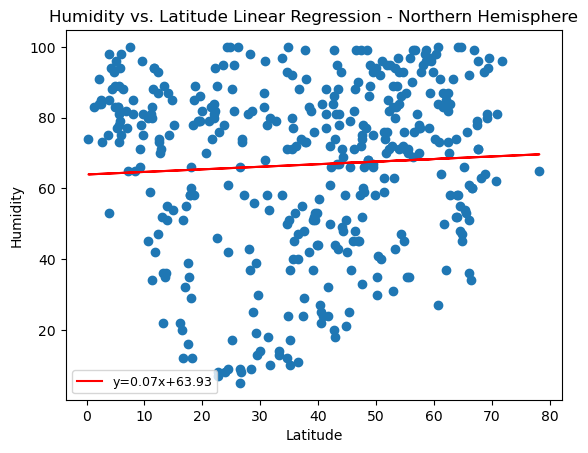

In [23]:
# Humidity vs. Latitude Linear Regression - Northern Hemisphere

# Extract data from dictionary
slope_humidity_north = plot_regress_humidity_north['Slope']
intercept_humidity_north = plot_regress_humidity_north['Intercept']
rvalue_humidity_north = plot_regress_humidity_north['Rvalue']

# Run linear regression
regress_values_humidity_north = x_values_north * slope_humidity_north + intercept_humidity_north
line_eq_humidity_north = "y = " + str(round(slope_humidity_north,2)) + "x + " + str(round(intercept_humidity_north,2))

# Plot scatter plot
plt.scatter(x_values_north,y_values_humidity_north)

# Plot regression line
plt.plot(x_values_north,regress_values_humidity_north, "r-", label='y={:.2f}x+{:.2f}'.format(slope_humidity_north,intercept_humidity_north) )

# Label plot
plt.title('Humidity vs. Latitude Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_humidity_north))

The r-value is: -0.07606525630693929


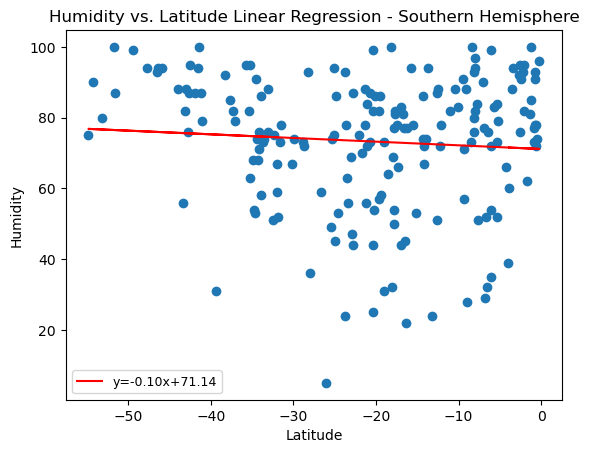

In [24]:
# Humidity vs. Latitude Linear Regression - Southern Hemisphere

# Extract data from dictionary
slope_humidity_south = plot_regress_humidity_south['Slope']
intercept_humidity_south = plot_regress_humidity_south['Intercept']
rvalue_humidity_south = plot_regress_humidity_south['Rvalue']

# Run linear regression
regress_values_humidity_south = x_values_south * slope_humidity_south + intercept_humidity_south
line_eq_humidity_south = "y = " + str(round(slope_humidity_south,2)) + "x + " + str(round(intercept_humidity_south,2))

# Plot scatter plot
plt.scatter(x_values_south,y_values_humidity_south)

# Plot regression line
plt.plot(x_values_south,regress_values_humidity_south, "r-", label='y={:.2f}x+{:.2f}'.format(slope_humidity_south,intercept_humidity_south) )

# Label plot
plt.title('Humidity vs. Latitude Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_humidity_south))

**Discussion about the linear relationship:**
In both observations, there are slight relationships between latitude and humidity. A positive relationship exists within Northern Hemisphere with R value being only 5.7% while a negative relationship exists within the Southern Heimspheres with R value being -7.6%.

In both hemispheres the data points are sparesely distributed away from the regression line. There also appears to be more outliers within the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10319517692109045


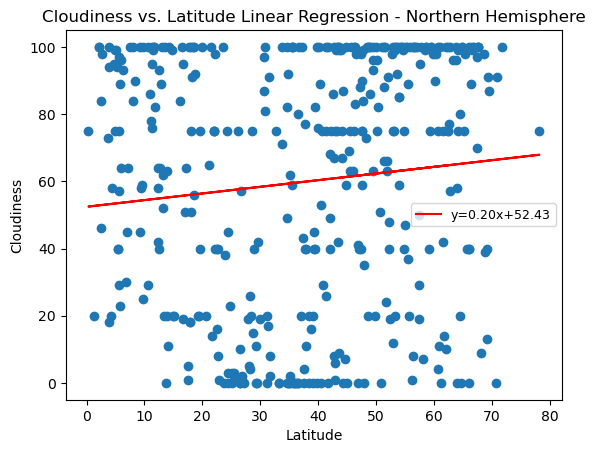

In [25]:
# Cloudiness vs. Latitude Linear Regression - Northern Hemisphere

# Extract data from dictionary
slope_cloudiness_north = plot_regress_cloudiness_north['Slope']
intercept_cloudiness_north = plot_regress_cloudiness_north['Intercept']
rvalue_cloudiness_north = plot_regress_cloudiness_north['Rvalue']

# Run linear regression
regress_values_cloudiness_north = x_values_north * slope_cloudiness_north + intercept_cloudiness_north
line_eq_cloudiness_north = "y = " + str(round(slope_cloudiness_north,2)) + "x + " + str(round(intercept_cloudiness_north,2))

# Plot scatter plot
plt.scatter(x_values_north,y_values_cloudiness_north)

# Plot regression line
plt.plot(x_values_north,regress_values_cloudiness_north, "r-", label='y={:.2f}x+{:.2f}'.format(slope_cloudiness_north,intercept_cloudiness_north) )

# Label plot
plt.title('Cloudiness vs. Latitude Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_cloudiness_north))

The r-value is: 0.09697855083872214


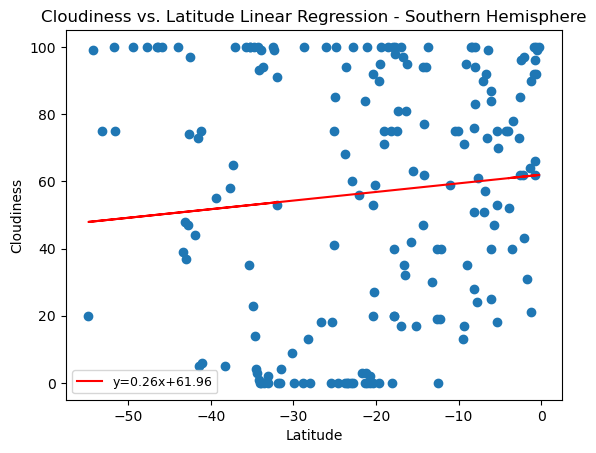

In [26]:
# Cloudiness vs. Latitude Linear Regression - Southern Hemisphere

# Extract data from dictionary
slope_cloudiness_south = plot_regress_cloudiness_south['Slope']
intercept_cloudiness_south = plot_regress_cloudiness_south['Intercept']
rvalue_cloudiness_south = plot_regress_cloudiness_south['Rvalue']

# Run linear regression
regress_values_cloudiness_south = x_values_south * slope_cloudiness_south + intercept_cloudiness_south
line_eq_cloudiness_south = "y = " + str(round(slope_cloudiness_south,2)) + "x + " + str(round(intercept_cloudiness_south,2))

# Plot scatter plot
plt.scatter(x_values_south,y_values_cloudiness_south)

# Plot regression line
plt.plot(x_values_south,regress_values_cloudiness_south, "r-", label='y={:.2f}x+{:.2f}'.format(slope_cloudiness_south,intercept_cloudiness_south) )

# Label plot
plt.title('Cloudiness vs. Latitude Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_cloudiness_south))

**Discussion about the linear relationship:** 
Postive linear relationships exist for both Northern and Southern Hemispheres between cloudiness and latitude. However the Quartile ranges for both hemispheres are quite significant. 
It is also observed that the R values are quite small for both, with Northern Hemisphere having 10% and Southern Hemisphere having 9.6%.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04069234438106959


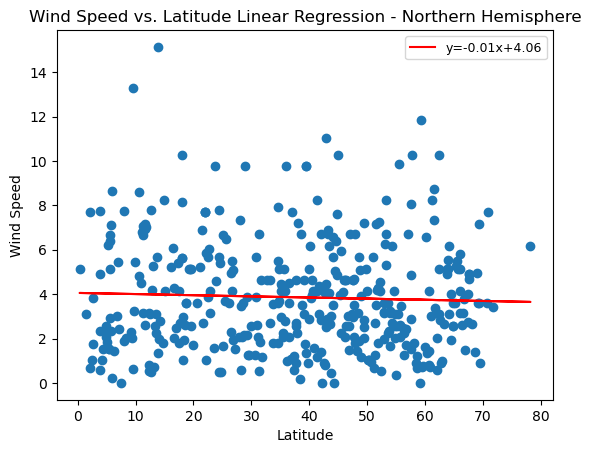

In [27]:
# Wind Speed vs. Latitude Linear Regression - Northern Hemisphere

# Extract data from dictionary
slope_wind_north = plot_regress_wind_north['Slope']
intercept_wind_north = plot_regress_wind_north['Intercept']
rvalue_wind_north = plot_regress_wind_north['Rvalue']

# Run linear regression
regress_values_wind_north = x_values_north * slope_wind_north + intercept_wind_north
line_eq_wind_north = "y = " + str(round(slope_wind_north,2)) + "x + " + str(round(intercept_wind_north,2))

# Plot scatter plot
plt.scatter(x_values_north,y_values_wind_north)

# Plot regression line
plt.plot(x_values_north,regress_values_wind_north, "r-", label='y={:.2f}x+{:.2f}'.format(slope_wind_north,intercept_wind_north) )

# Label plot
plt.title('Wind Speed vs. Latitude Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_wind_north))

The r-value is: -0.15147729375023516


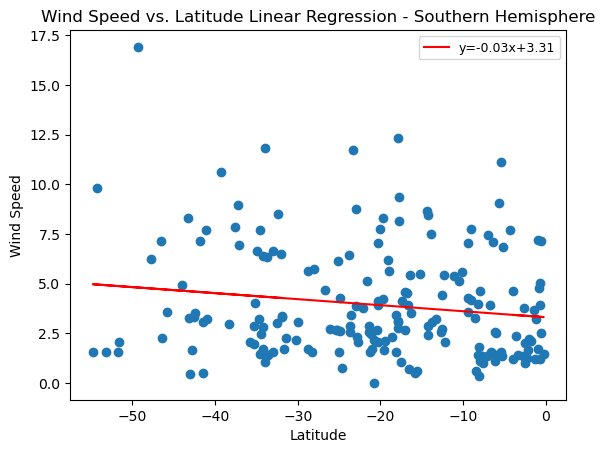

In [28]:
# Wind Speed vs. Latitude Linear Regression - Southern Hemisphere

# Extract data from dictionary
slope_wind_south = plot_regress_wind_south['Slope']
intercept_wind_south = plot_regress_wind_south['Intercept']
rvalue_wind_south = plot_regress_wind_south['Rvalue']

# Run linear regression
regress_values_wind_south = x_values_south * slope_wind_south + intercept_wind_south
line_eq_wind_south = "y = " + str(round(slope_wind_south,2)) + "x + " + str(round(intercept_wind_south,2))

# Plot scatter plot
plt.scatter(x_values_south,y_values_wind_south)

# Plot regression line
plt.plot(x_values_south,regress_values_wind_south, "r-", label='y={:.2f}x+{:.2f}'.format(slope_wind_south,intercept_wind_south) )

# Label plot
plt.title('Wind Speed vs. Latitude Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend(fontsize=9)

print('The r-value is: ' + str(rvalue_wind_south))

**Discussion about the linear relationship:** 
Negative linear relationships exist between Wind Speed and Latitude for both Northern and Southern Hemispheres. The Wind Speed declines as the Latitude increases in both Hemispheres. 
It is also observed that there are a few outliers in the Southern Hemisphere. 